In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [27]:
# Load the dataset
def load_data(filepath, sheet_name="glass"):
    df = pd.read_excel(filepath, sheet_name=sheet_name)
    return df


In [37]:
# Perform exploratory data analysis
def eda(df):
    print("Dataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nClass Distribution:")
    print(df['Type'].value_counts())
    print("\nSummary Statistics:")
    print(df.describe())
        # Visualize class distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(x="Type", data=df, palette="viridis")
    plt.title("Distribution of Glass Types")
    plt.show()
    # Box plots for outliers
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df.drop(columns=["Type"]))
    plt.xticks(rotation=45)
    plt.title("Box Plot of Features")
    plt.show()

In [40]:
# Data Preprocessing
def preprocess_data(df):
    X = df.drop(columns=["Type"])
    y = df["Type"]
    # Standardizing the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
     # Handling class imbalance with SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    return train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [34]:

# Train and evaluate a Random Forest model
def train_random_forest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    print("Random Forest Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [44]:
# Compare Bagging and Boosting methods
def bagging_boosting_comparison(X_train, X_test, y_train, y_test):
    models = {
        "Bagging": BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42),
        "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f"\n{name} Model Performance:")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

Missing Values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Class Distribution:
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

Summary Statistics:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.00

<ipython-input-37-9c932e8099b4>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Type", data=df, palette="viridis")


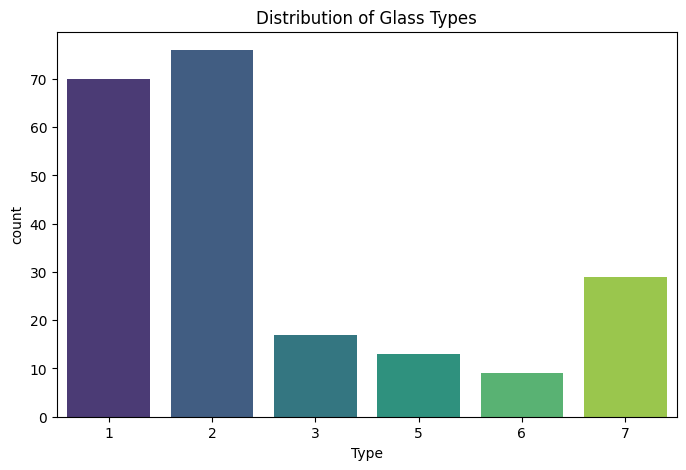

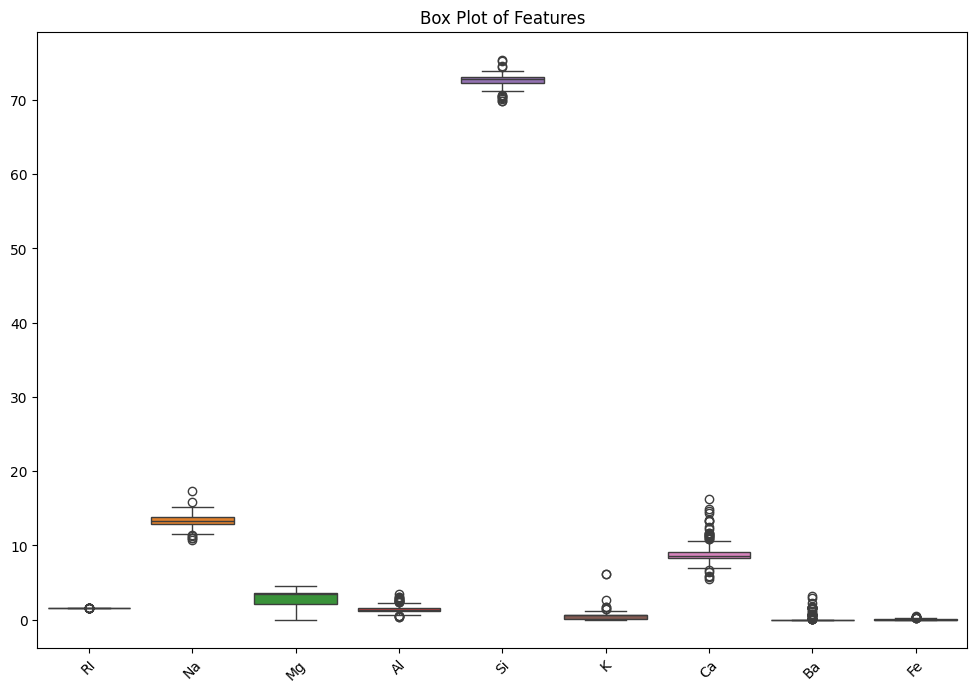

Random Forest Model Performance:
Accuracy: 0.9239130434782609
Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92

Confusion Matrix:
 [[13  2  2  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0  0 14  0  0]
 [ 0  0  0  0 14  0]
 [ 0  1  0  0  0 17]]


In [42]:

# Main function
def main():
    file_path = "glass.xlsx"  # Change this to the correct path if needed
    df = load_data(file_path)

    eda(df)
    X_train, X_test, y_train, y_test = preprocess_data(df)

    train_random_forest(X_train, X_test, y_train, y_test)
    bagging_boosting_comparison(X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    main()

